# PhishingWebsites 釣魚網站辨識

資料來源:   
[OpenML](https://www.openml.org/d/4534)  
[UCI](https://archive.ics.uci.edu/ml/datasets/phishing+websites)


# Preprocessing Data

# I.I 匯入套件

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

---

# I.II 匯入資料

In [2]:
df = pd.read_csv('D:/DataMining/week05/phpV5QYya.csv')

In [3]:
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [4]:
print("資料總數：",df.shape[0],"\n屬性總數：",df.shape[1])

資料總數： 11055 
屬性總數： 31


## 1.資料特徵

In [5]:
df.columns.values

array(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain',
       'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index',
       'Links_pointing_to_page', 'Statistical_report', 'Result'],
      dtype=object)

In [6]:
attribute = df.columns.values
column=['Details']
attribute_df=pd.DataFrame(index=attribute,columns = column)

In [7]:
detail=[['網址是否是為IP(有ip可能為釣魚)'], ['URL長度(一般為54字元，多於75字元可能為釣魚)'], ['短網址(有短網址可能為釣魚)'],
       ['是某有@(@後方為真正指向的網址，有@者可能為釣魚)'], ['重新指向//的位置(//若從第8字元開始可能為釣魚網站)'], ['前綴或後綴放入-來分開網址'],
       ['多個子網域(大於2個就有可能是釣魚)'], ['SSL憑證年數2年以上為良好'],
       ['網域到期年限'], ['從其他網域加載小圖示'], ['是否為標準端口'], ['網址內是否放入HTTPS做混淆'],
       ['是否有外部加載(是否同網域)'], ['錨點(是否同網域 tag數量是否大於8成)'], ['網頁原始碼tags(是否同網域)'], ['表單處理程序(是否同網域)'],
       ['用戶的信息指向給某一信箱'], ['詭異網址(由WHOIS可查閱網址的合法性和主機商資訊)'], ['網站被重定向的次數(4次)'], ['游標觸發特定JavaScript函式(on_mouseover)'],
       ['禁止右鍵(阻止查看網頁相關資料)'], ['彈出視窗(通過彈出視窗要求填寫個人訊息)'], ['內嵌框架(用來在網頁內內置另一個網頁)'], ['網域年齡'],
       ['是否有DNS紀錄'], ['網站瀏覽量(100,000)'], ['網頁排名(0-1，小於0.2為釣魚)'], ['Google檢索(有檢索就會被google搜尋出來)'],
       ['外部連結此頁面的數量(>2為非)'], ['統計報告(PhishTank&StopBadware)'], ['結果']]

In [8]:
attribute_df=pd.DataFrame(detail,index=attribute,columns = column)

In [9]:
attribute_df

,Details
having_IP_Address,網址是否是為IP(有ip可能為釣魚)
URL_Length,URL長度(一般為54字元，多於75字元可能為釣魚)
Shortining_Service,短網址(有短網址可能為釣魚)
having_At_Symbol,是某有@(@後方為真正指向的網址，有@者可能為釣魚)
double_slash_redirecting,重新指向//的位置(//若從第8字元開始可能為釣魚網站)
Prefix_Suffix,前綴或後綴放入-來分開網址
having_Sub_Domain,多個子網域(大於2個就有可能是釣魚)
SSLfinal_State,SSL憑證年數2年以上為良好
Domain_registeration_length,網域到期年限
Favicon,從其他網域加載小圖示


---

# III. 資料清整與處理

## 1.缺失值

In [10]:
df.isna().values.any()

False

## 2.離異值

In [11]:
df.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


---

# IV. 資料視覺化分析

Result是作者的分析結果，Statistical_report是依全球最大兩個公告釣魚網站資訊的網站分類做輔助

## 1.標籤轉換
> 轉換標籤 **Result**

In [13]:
df['Result'].replace(-1, 'Legitimate',inplace=True)
df['Result'].replace(1, 'Phishing',inplace=True)

In [14]:
df['Result'].head(3)

0    Legitimate
1    Legitimate
2    Legitimate
Name: Result, dtype: object

> 轉換標籤 **Statistical_report** (是否屬於PhishTank前10大釣魚ip和StopBadware的前50大釣魚IP)

In [15]:
df['Statistical_report'].replace(-1, 'Legitimate',inplace=True)
df['Statistical_report'].replace(1, 'Phishing',inplace=True)

## 2.釣魚網站數量

#### 2.1 Result V.S. Statistical_report

In [16]:
display(df['Result'].value_counts(dropna=True),df['Statistical_report'].value_counts(dropna=True))

Phishing      6157
Legitimate    4898
Name: Result, dtype: int64

Phishing      9505
Legitimate    1550
Name: Statistical_report, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


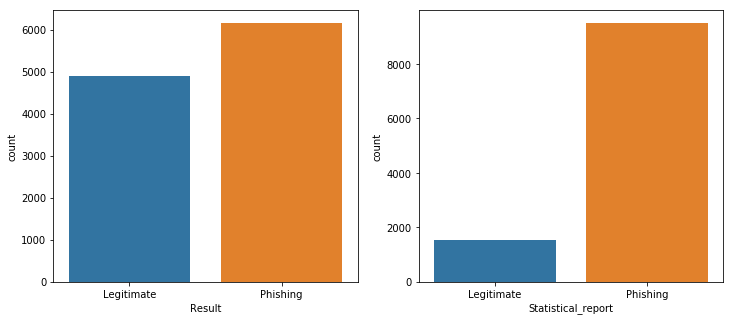

In [17]:
fig, ax = plt.subplots(1,2,figsize = (12, 5))
sns.countplot(df['Result'],ax=ax[0])
sns.countplot(df['Statistical_report'], ax=ax[1])
fig.show()

---

## 3.釣魚網站特徵分類分析
> 3.1 地址欄位分析 (Address Bar based Features)  
3.2 異常分析 (Abnormal Based Features)  
3.3 HTML和JavaScript代碼分析 (HTML and JavaScript based Feature)  
3.4 網域分析 (Domain based Features)  
3.5 全特徵決策樹分析 (Decesion Tree)

### 3.1地址欄位分析 (Address Bar based Features)

In [18]:
address = df.columns[0:12]
print('特徵數量：',len(address),'\n特徵：',address)

特徵數量： 12 
特徵： Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token'],
      dtype='object')


In [19]:
for i in df.columns[0:12]:
    #print(i)
    value_counts = df[i].value_counts(dropna=True, sort=False)
    #print(value_counts)
    item_df = value_counts.rename_axis(i).reset_index(name='Amounts')
    #display(item_df)

In [20]:
address = df.columns[0:12]
column=['Suspicious','Yes(1)','No(-1)']
address_df=pd.DataFrame(index=address,columns = column)
amount=[[0,7262,3793],[135,1960,8960],[0,9611,1444],
        [0,9400,1655],[0,9626,1429],[0,1465,9590],
        [3622,4070,3360],[1167,6331,3557],[0,3666,7389],
        [0,9002,2053],[0,9553,1502],[0,9259,1796]]
address_df=pd.DataFrame(amount,index=address,columns = column)
#address_df=address_df.drop(['Suspicious'], axis=1)
address_df

,Suspicious,Yes(1),No(-1)
having_IP_Address,0,7262,3793
URL_Length,135,1960,8960
Shortining_Service,0,9611,1444
having_At_Symbol,0,9400,1655
double_slash_redirecting,0,9626,1429
Prefix_Suffix,0,1465,9590
having_Sub_Domain,3622,4070,3360
SSLfinal_State,1167,6331,3557
Domain_registeration_length,0,3666,7389
Favicon,0,9002,2053


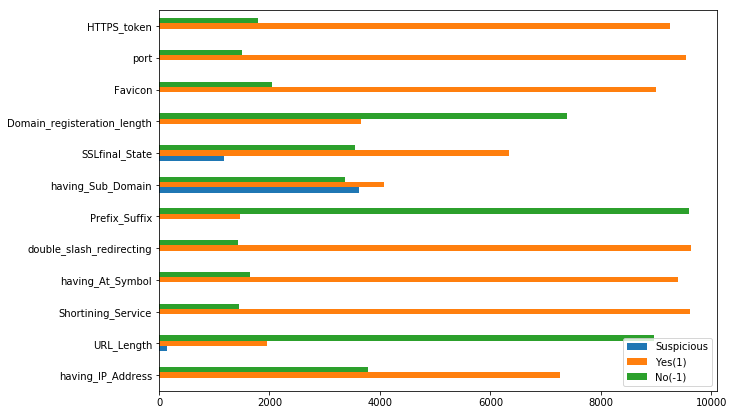

In [81]:
address_df.plot(kind="barh",figsize =(10,7))

**綜觀所有網站而言：**
1. (URL_Length) 普遍網址長度不會太長(大於75個字元)
2. (prefix_Suffix) 網站也不會特地在網址內的前後綴放入"-"，譬如：http://www.Confirmethepayment-paypal.com/
3. (Domain_registration_length) 多數網站網域到期時間<1年
4. (Shorting_Service) 滿多網站都會採用短網址服務
5. (double_slash_redirecting) 多數網站最後出現的雙斜線都大於字元的第7個位置(未知)
6. (port) 多數網站的端口設定為標準端口，譬如ftp是port:21、SSH是port:22
7. (https_token) 大多網址都含有https，但釣魚網站的https位置可能不同，譬如http://https-www-paypal-it-webapps-mpp-home.soft-hair.comm/

#### having_IP_Address

Text(0.5,1,'01.having_IP_Address')

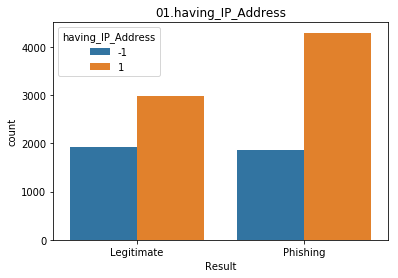

In [83]:
sns.countplot(df['Result'],hue=df['having_IP_Address'])
plt.title('01.having_IP_Address')

#### URL_Length

-1: URL>75
0: 54<URL<75
1: URL<54


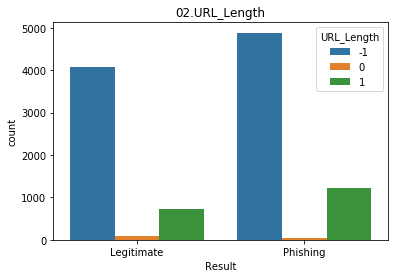

In [88]:
sns.countplot(df['Result'],hue=df['URL_Length'])
plt.title('02.URL_Length')
print("-1: URL>75\n0: 54<URL<75\n1: URL<54")

#### Shortining_Service

Text(0.5,1,'03.Shortining_Service')

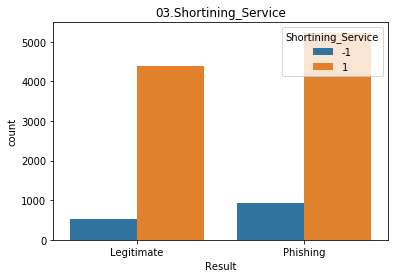

In [89]:
sns.countplot(df['Result'],hue=df['Shortining_Service'])
plt.title('03.Shortining_Service')

#### having_At_Symbol

Text(0.5,1,'04.having @ Symbol')

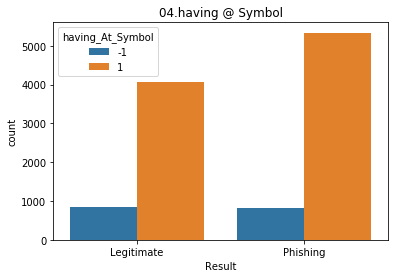

In [92]:
sns.countplot(df['Result'],hue=df['having_At_Symbol'])
plt.title('04.having @ Symbol')

#### double_slash_redirecting

Text(0.5,1,'05.Last Occurrence of double_slash_redirecting')

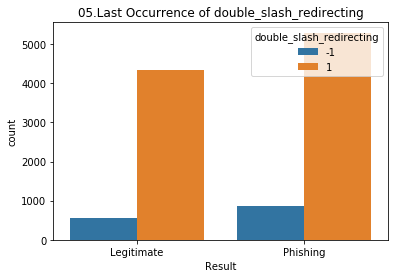

In [28]:
sns.countplot(df['Result'],hue=df['double_slash_redirecting'])
plt.title('05.Last Occurrence of double_slash_redirecting')

#### Prefix_Suffix

Text(0.5,1,'06.Domain Name Part Includes (-) Symbol ')

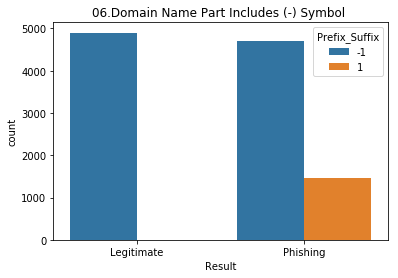

In [29]:
sns.countplot(df['Result'],hue=df['Prefix_Suffix'])
plt.title('06.Domain Name Part Includes (-) Symbol ')

#### having_Sub_Domain

http://www.hud.ac.uk/students/
hud是實際網域名；ac.uk是二級網域；uk是頂級網域

-1: Legitimate(僅1個子網域)
0: Suspicious(有2個子網域)
1: Phishing(>2個子網域)


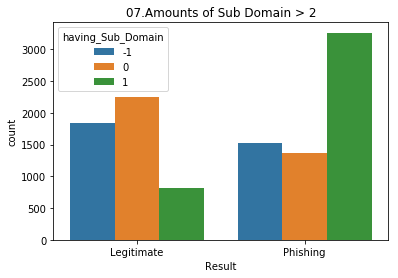

In [96]:
sns.countplot(df['Result'],hue=df['having_Sub_Domain'])
plt.title('07.Amounts of Sub Domain > 2')
print("http://www.hud.ac.uk/students/")
print("hud是實際網域名；ac.uk是二級網域；uk是頂級網域\n")
print("-1: Legitimate(僅1個子網域)\n0: Suspicious(有2個子網域)\n1: Phishing(>2個子網域)")

#### SSL final_State

-1: Legitimate(≥ 1 Year )
0: Suspicious( Using https and Issuer Is Not Trusted)
1: Phishing(≤ 1 Year or others)


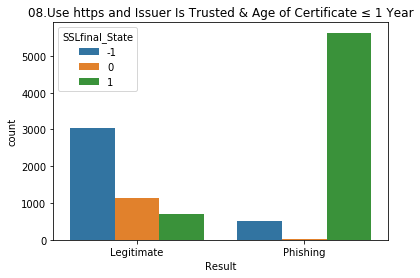

In [97]:
sns.countplot(df['Result'],hue=df['SSLfinal_State'])
plt.title('08.Use https and Issuer Is Trusted & Age of Certificate ≤ 1 Year')
print("-1: Legitimate(≥ 1 Year )\n0: Suspicious( Using https and Issuer Is Not Trusted)\n1: Phishing(≤ 1 Year or others)")

#### Domain_registeration_length ≥ 1 year

Text(0.5,1,'09.Domains Expires on ≥ 1 year')

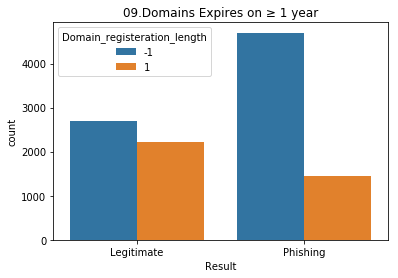

In [102]:
sns.countplot(df['Result'],hue=df['Domain_registeration_length'])
plt.title('09.Domains Expires on ≥ 1 year')

#### Favicon

Text(0.5,1,'10.Favicon Loaded From External Domain')

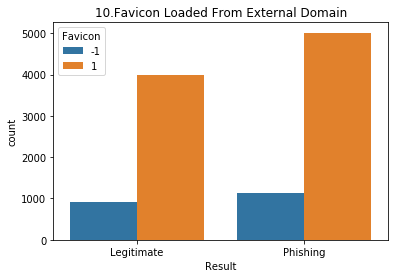

In [33]:
sns.countplot(df['Result'],hue=df['Favicon'])
plt.title('10.Favicon Loaded From External Domain')

#### port

Text(0.5,1,'11.standard port')

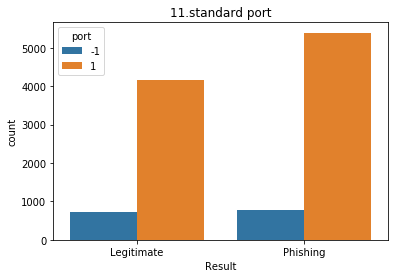

In [34]:
sns.countplot(df['Result'],hue=df['port'])
plt.title('11.standard port')

#### HTTPS_token

http://https-www-paypal-it-webapps-mpp-home.soft-hair.com/


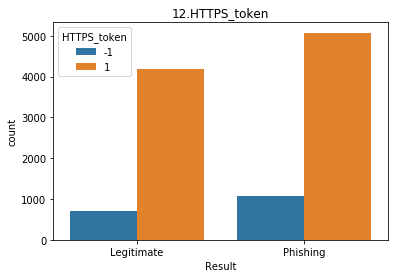

In [35]:
sns.countplot(df['Result'],hue=df['HTTPS_token'])
plt.title('12.HTTPS_token')
print("http://https-www-paypal-it-webapps-mpp-home.soft-hair.com/")

### Decesion Tree

In [109]:
x = df[['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token']]
y = df['Result']

In [110]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25) #劃分訓練集和測試集

In [119]:
from sklearn import tree
cate = tree.DecisionTreeClassifier(criterion='gini',max_depth=4) #默認gini，深度4
address_cate = cate.fit(x_train, y_train)

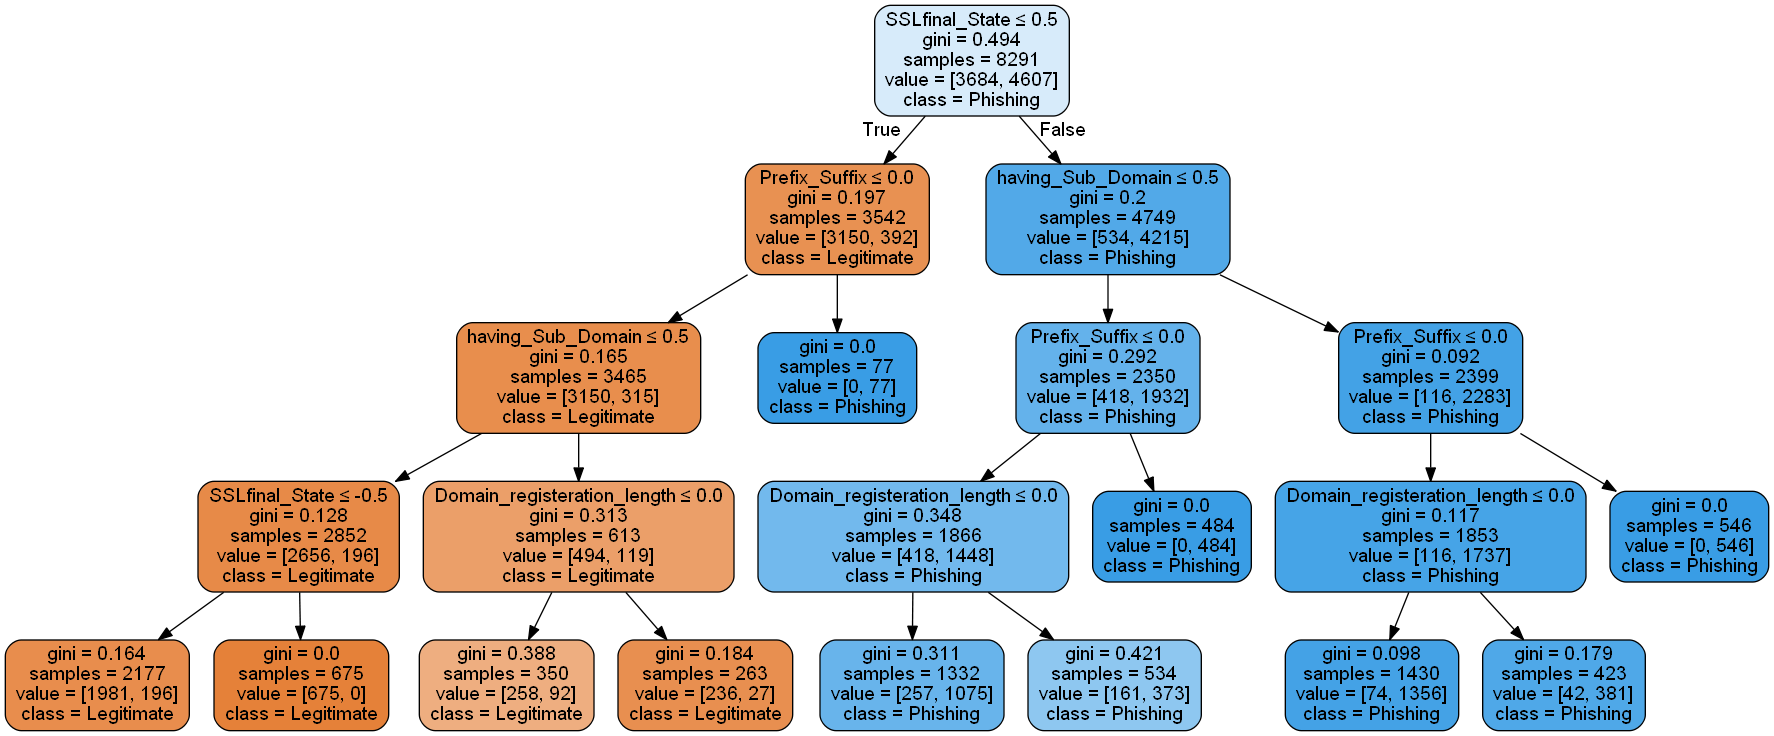

In [120]:
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
from IPython.display import Image
import os
os.environ['PATH'] = os.environ['PATH'] + (';c:\\Program Files (x86)\\Graphviz2.38\\bin\\') # 解決Graphviz無法在jupyter生成的問題

#使用 pydotplus在jupyter內生成決策樹圖
dot_tree = tree.export_graphviz(address_cate,out_file=None,feature_names=list(x),class_names=['Legitimate','Phishing'],filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_tree)
Image(graph.create_png())

**從地址欄位特徵分析：**  
SSL final_State、Prefix_Suffix、having_Sub_Domain  
網站SSL憑證和有效期限、網址內是否有(-)、子網域的數量，比較能分辨得出釣魚網站和正常網站

### 3.2 異常分析 (Abnormal Based Features)

In [36]:
abnormal = df.columns[12:18]
print('特徵數量：',len(abnormal),'\n特徵：',abnormal)

特徵數量： 6 
特徵： Index(['Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL'],
      dtype='object')


In [37]:
for i in df.columns[12:18]:
    #print(i)
    value_counts = df[i].value_counts(dropna=True, sort=False)
    #print(value_counts)
    item_df = value_counts.rename_axis(i).reset_index(name='Amounts')
    #display(item_df)

In [38]:
abnormal = df.columns[12:18]
column=['Suspicious','Yes(1)','No(-1)']
abnormal_df=pd.DataFrame(index=abnormal,columns = column)
abnormal_amount=[[0,6560,4495],[5337,2436,3282],[4449,2650,3956],
        [761,1854,8440],[0,9041,2041],[0,9426,1629]]
abnormal_df=pd.DataFrame(abnormal_amount,index=abnormal,columns = column)
#abnormal_df=abnormal_df.drop(['Suspicious'], axis=1)
abnormal_df

,Suspicious,Yes(1),No(-1)
Request_URL,0,6560,4495
URL_of_Anchor,5337,2436,3282
Links_in_tags,4449,2650,3956
SFH,761,1854,8440
Submitting_to_email,0,9041,2041
Abnormal_URL,0,9426,1629


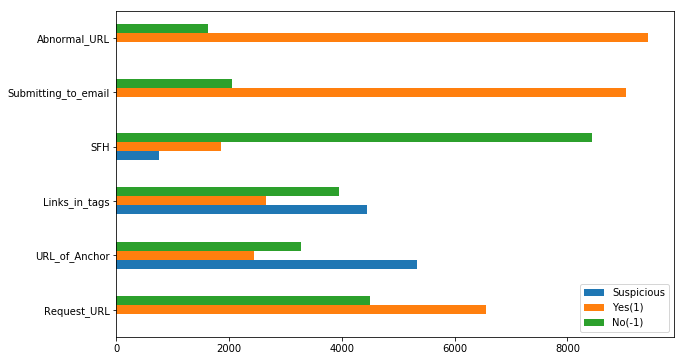

In [78]:
abnormal_df.plot(kind="barh",figsize =(10,6))

**綜觀所有網站而言：**
1. (SFH) 大部份網站送出資料表的server和網站本身網域不同，譬如結帳時網站導向PayPal進行付款
2. (Submitting_to_email) 大部份表單資料可能會送到某個信箱，這是以網頁php原始碼是否有mail()判斷；不少購物網站以php建構購物車，商家都會設立自己的信箱作為通知信
3. (Abnormal_URL) 大部份網站的網址內不會包含主機商的網址，譬如 byehost：http://帳號.byethost7.com，都會另申請網域進行轉址

#### Request_URL

Text(0.5,1,'01.Request_URL not in same domain (such as picture) > 61%')

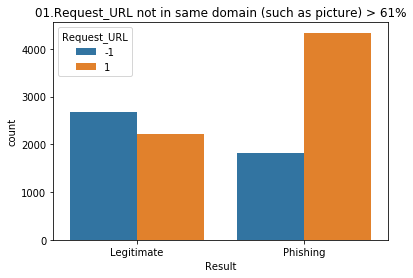

In [40]:
sns.countplot(df['Result'],hue=df['Request_URL'])
plt.title('01.Request_URL not in same domain (such as picture) > 61%')

#### URL_of_Anchor

Text(0.5,1,'02.Tag <a> refer to nothing > 67%')

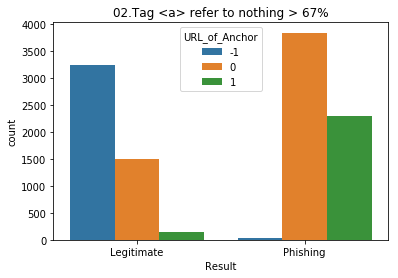

In [41]:
sns.countplot(df['Result'],hue=df['URL_of_Anchor'])
plt.title('02.Tag <a> refer to nothing > 67%')

#### Links_in_tags

Text(0.5,1,'03. Links in <Meta>, <Script> and <Link> tags > 81%')

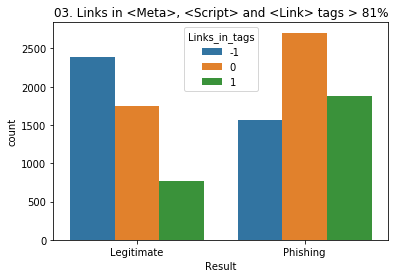

In [42]:
sns.countplot(df['Result'],hue=df['Links_in_tags'])
plt.title('03. Links in <Meta>, <Script> and <Link> tags > 81%')

#### SFH

Text(0.5,1,'04.SFH refer to Empty(1) / SFH Refers To A Different Domain(0)')

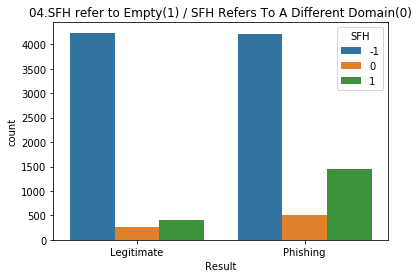

In [43]:
sns.countplot(df['Result'],hue=df['SFH'])
plt.title('04.SFH refer to Empty(1) / SFH Refers To A Different Domain(0)')

#### Submitting_to_email

Text(0.5,1,'05. Using mail() or mailto: Function to Submit User Information')

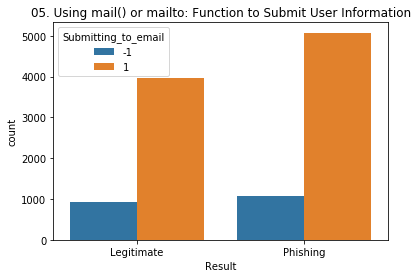

In [44]:
sns.countplot(df['Result'],hue=df['Submitting_to_email'])
plt.title('05. Using mail() or mailto: Function to Submit User Information')

#### Abnormal_URL

Text(0.5,1,'06.The Host Name Is Not Included In URL')

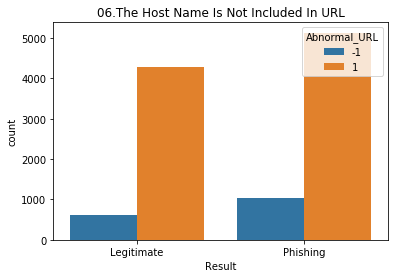

In [45]:
sns.countplot(df['Result'],hue=df['Abnormal_URL'])
plt.title('06.The Host Name Is Not Included In URL')

### Decesion Tree

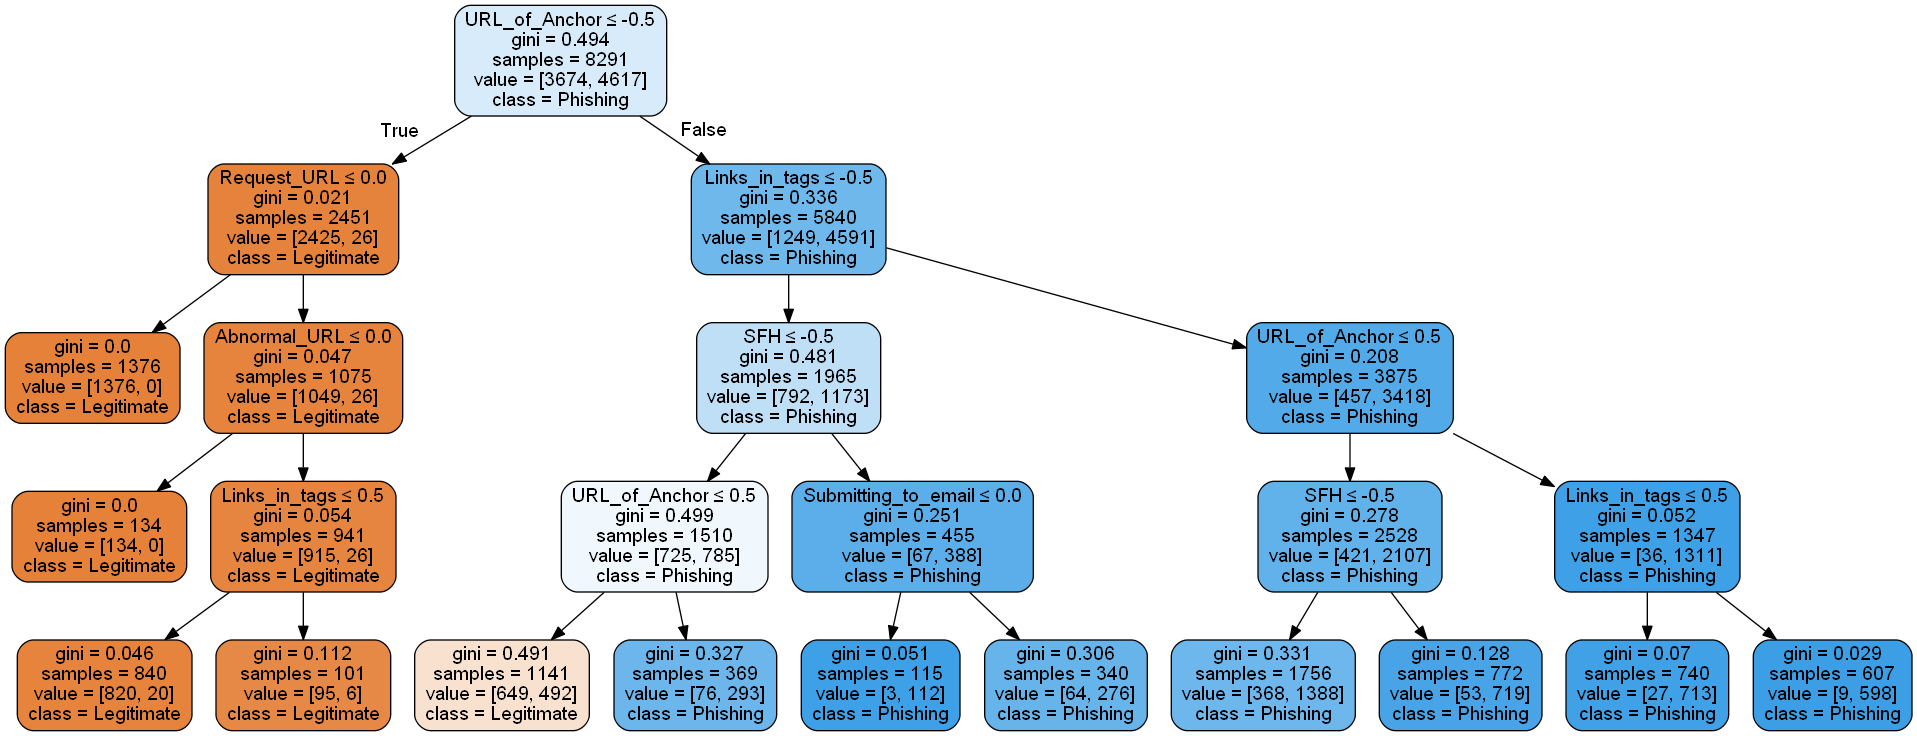

In [142]:
x = df[['Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL']]
y = df['Result']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25) #劃分訓練集和測試集

from sklearn import tree
cate = tree.DecisionTreeClassifier(criterion='gini',max_depth=4) #默認gini，深度3
abnormal_cate = cate.fit(x_train, y_train)

from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
from IPython.display import Image
import os
os.environ['PATH'] = os.environ['PATH'] + (';c:\\Program Files (x86)\\Graphviz2.38\\bin\\') # 解決Graphviz無法在jupyter生成的問題

#使用 pydotplus在jupyter內生成決策樹圖
dot_tree = tree.export_graphviz(abnormal_cate,out_file=None,feature_names=list(x),class_names=['Legitimate','Phishing'],filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_tree)
Image(graph.create_png())

**從異常欄位特徵分析：**  
URL_of_Anchor   
網頁原始碼裡面錨點若指向為空者居多的，就有可能釣魚網站

---

### 3.3 HTML和JavaScript代碼分析 (HTML and JavaScript based Feature)  

In [46]:
html = df.columns[18:23]
print('特徵數量：',len(html),'\n特徵：',html)

特徵數量： 5 
特徵： Index(['Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe'], dtype='object')


In [47]:
for i in df.columns[18:23]:
    value_counts = df[i].value_counts(dropna=True, sort=False)
    item_df = value_counts.rename_axis(i).reset_index(name='Amounts')
    #display(item_df)

In [48]:
html = df.columns[18:23]
column=['Suspicious','Yes(1)','No(-1)']
html_df=pd.DataFrame(index=html,columns = column)
amount=[[9776,1279,0],[135,1960,8960],[0,10579,476],
        [0,8918,2137],[0,10043,1012]]
html_df=pd.DataFrame(amount,index=html,columns = column)
#html_df=html_df.drop(['Suspicious'], axis=1)
html_df

,Suspicious,Yes(1),No(-1)
Redirect,9776,1279,0
on_mouseover,135,1960,8960
RightClick,0,10579,476
popUpWidnow,0,8918,2137
Iframe,0,10043,1012


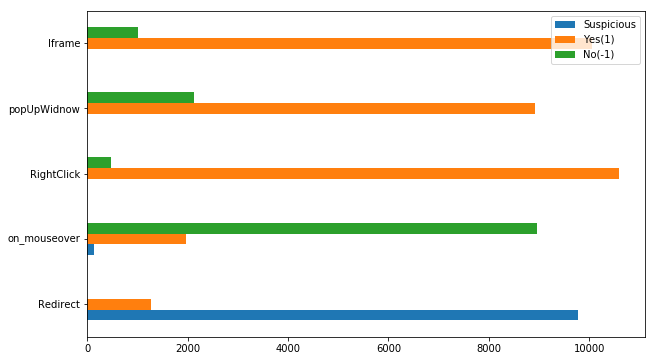

In [79]:
html_df.plot(kind="barh",figsize =(10,6))

**綜觀所有網站而言：**
1. (Redirect) 多數網站重新導向次數不會介於2-4次
2. (Right_click) 多數網站禁用右鍵，尊重著作權
3. (popupwindow) 多數網站都會有彈跳視窗
4. (iframe) 多數網站都有內遷的頁面重新導向

#### Redirect times

Text(0.5,1,'01.redirected times of Redirect Page: ≥2&<4→Suspiciou(0)/ >4 Phishing(1)')

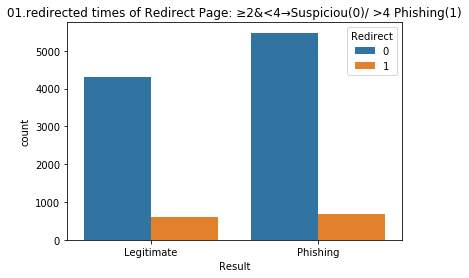

In [50]:
sns.countplot(df['Result'],hue=df['Redirect'])
plt.title('01.redirected times of Redirect Page: ≥2&<4→Suspiciou(0)/ >4 Phishing(1)')

#### on_mouseover event

Phishers may use JavaScript to show a fake URL in the status bar to users


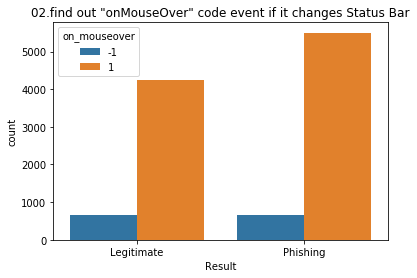

In [51]:
sns.countplot(df['Result'],hue=df['on_mouseover'])
plt.title('02.find out "onMouseOver" code event if it changes Status Bar')
print("Phishers may use JavaScript to show a fake URL in the status bar to users")

#### Disabling Right Click

Text(0.5,1,'03. Disabling Right Click')

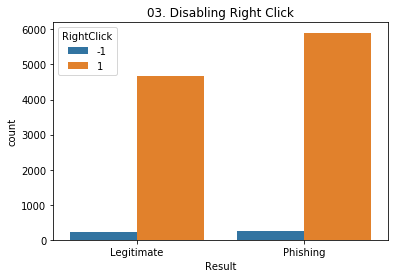

In [52]:
sns.countplot(df['Result'],hue=df['RightClick'])
plt.title('03. Disabling Right Click')

#### PopoUpWindow Contains Text Fields

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


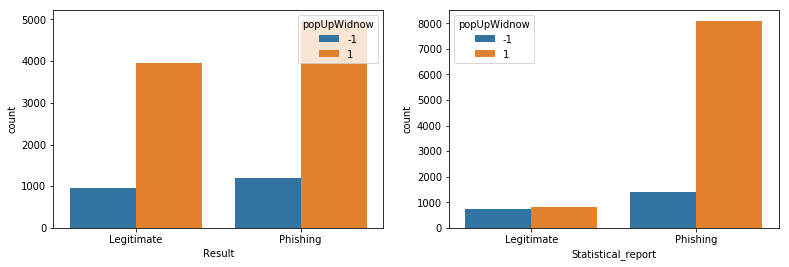

In [53]:
fig, ax = plt.subplots(1,2,figsize = (13, 4))
sns.countplot(df['Result'],hue=df['popUpWidnow'], ax=ax[0])
sns.countplot(df['Statistical_report'],hue=df['popUpWidnow'], ax=ax[1])
fig.show()

#### Iframe

Text(0.5,1,'05. Using Iframe')

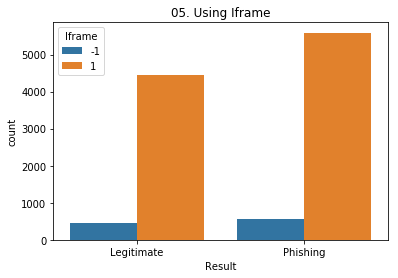

In [54]:
sns.countplot(df['Result'],hue=df['Iframe'])
plt.title('05. Using Iframe')

### Decesion Tree

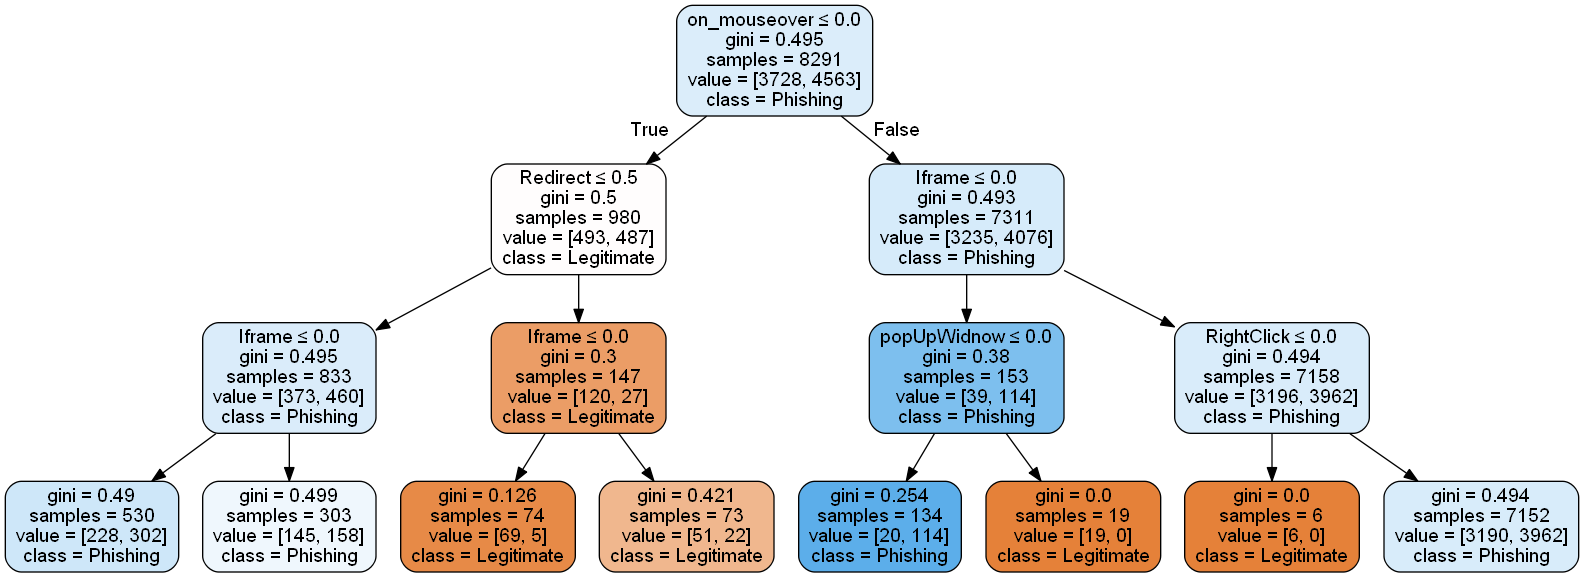

In [141]:
x = df[['Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe']]
y = df['Result']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25) #劃分訓練集和測試集

from sklearn import tree
cate = tree.DecisionTreeClassifier(criterion='gini',max_depth=3) #默認gini，深度3
html_cate = cate.fit(x_train, y_train)

from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
from IPython.display import Image
import os
os.environ['PATH'] = os.environ['PATH'] + (';c:\\Program Files (x86)\\Graphviz2.38\\bin\\') # 解決Graphviz無法在jupyter生成的問題

#使用 pydotplus在jupyter內生成決策樹圖
dot_tree = tree.export_graphviz(html_cate,out_file=None,feature_names=list(x),class_names=['Legitimate','Phishing'],filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_tree)
Image(graph.create_png())

**從HTML和JavaScript代碼特徵分析：**  
沒有太能分辨出來的特徵

----

### 3.4 網域分析 (Domain based Features)

In [55]:
domain = df.columns[23:30]
print('特徵數量：',len(domain),'\n特徵：',domain)

特徵數量： 7 
特徵： Index(['age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report'],
      dtype='object')


In [56]:
for i in df.columns[23:30]:
    value_counts = df[i].value_counts(dropna=True, sort=False)
    item_df = value_counts.rename_axis(i).reset_index(name='Amounts')
    #display(item_df)

In [57]:
domain = df.columns[23:30]
column=['Suspicious','Yes(1)','No(-1)']
domain_df=pd.DataFrame(index=domain,columns = column)
amount=[[0,5866,5189],[0,7612,3443],[2569,5831,2655],
        [0,2854,8201],[0,9516,1539],[6156,4351,548],
        [0,9505,1550]]
domain_df=pd.DataFrame(amount,index=domain,columns = column)
#domain_df=domain_df.drop(['Suspicious'], axis=1)
domain_df

,Suspicious,Yes(1),No(-1)
age_of_domain,0,5866,5189
DNSRecord,0,7612,3443
web_traffic,2569,5831,2655
Page_Rank,0,2854,8201
Google_Index,0,9516,1539
Links_pointing_to_page,6156,4351,548
Statistical_report,0,9505,1550


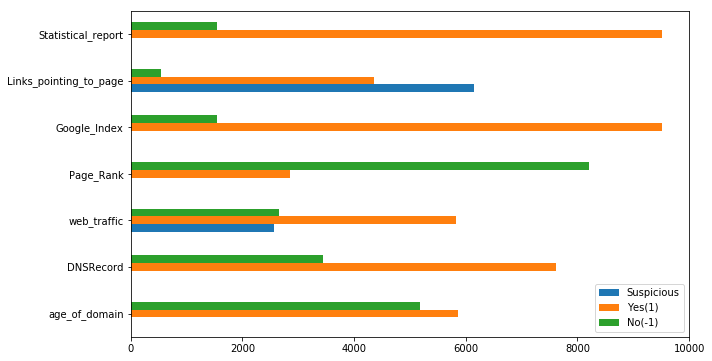

In [80]:
domain_df.plot(kind="barh",figsize =(10,6))

**綜觀所有網站而言：**
1. (DNSrecord) 多數網站沒有DNS紀錄
2. (Page_rank) 又稱網頁排名(數值從0-1)，代表網頁的重要程度，谷歌搜尋引擎用它來分析網頁的相關性和重要性，多數網站重要性不高
3. (Google_Index) 多數網站都有在谷歌檢索
4. (iframe) 多數網站都有內嵌的頁面重新導向
5. (Statistical_report) 9成網站屬於PhishTank前10大釣魚ip或StopBadware的前50大釣魚IP

#### age_of_domain

Text(0.5,1,'01.Age Of Domain < 6 months ')

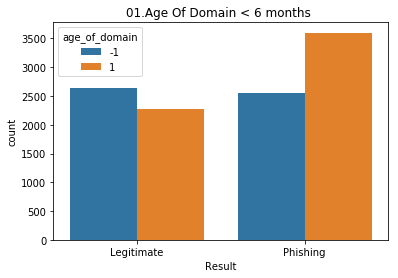

In [59]:
sns.countplot(df['Result'],hue=df['age_of_domain'])
plt.title('01.Age Of Domain < 6 months ')

#### DNSRecord

Text(0.5,1,'02.no DNS Record For The Domain')

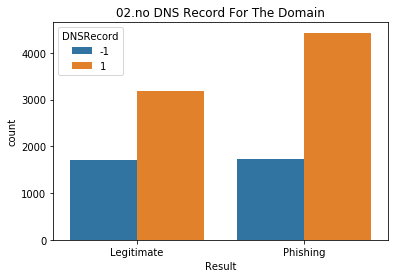

In [60]:
sns.countplot(df['Result'],hue=df['DNSRecord'])
plt.title('02.no DNS Record For The Domain')

#### web_traffic

-1: Website Rank<100,000
0: Website Rank>100,000
1: no traffic or is not recognized


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


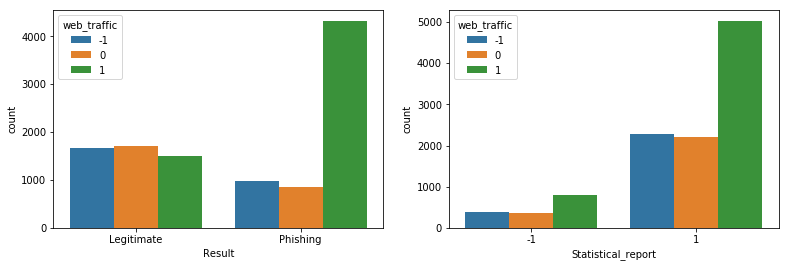

In [148]:
fig, ax = plt.subplots(1,2,figsize = (13, 4))
sns.countplot(df['Result'],hue=df['web_traffic'], ax=ax[0])
sns.countplot(df['Statistical_report'],hue=df['web_traffic'], ax=ax[1])
fig.show()
print("-1: Website Rank<100,000\n0: Website Rank>100,000\n1: no traffic or is not recognized")

#### Page_Rank < 0.2

Text(0.5,1,'04.PageRank < 0.2')

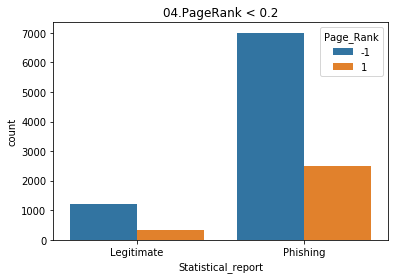

In [62]:
sns.countplot(df['Statistical_report'],hue=df['Page_Rank'])
plt.title('04.PageRank < 0.2')

#### Google_Index

Text(0.5,1,'05.Webpage not Indexed by Google')

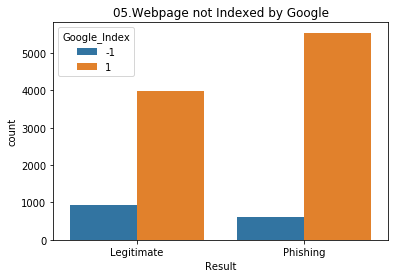

In [63]:
sns.countplot(df['Result'],hue=df['Google_Index'])
plt.title('05.Webpage not Indexed by Google')

#### Links_pointing_to_page

Text(0.5,1,'06.')

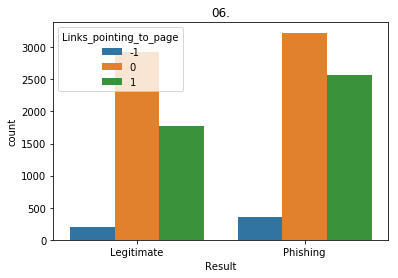

In [64]:
sns.countplot(df['Result'],hue=df['Links_pointing_to_page'])
plt.title('06.')

#### Statistical_report

Text(0.5,1,'07.PhishTank TOP10 IP or StopBadware TOP50 IP')

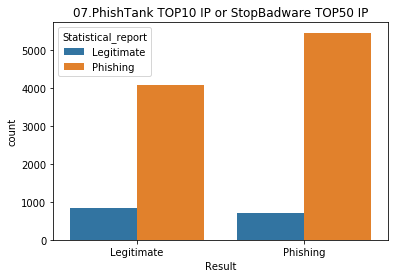

In [65]:
sns.countplot(df['Result'],hue=df['Statistical_report'])
plt.title('07.PhishTank TOP10 IP or StopBadware TOP50 IP')

### DecesionTree

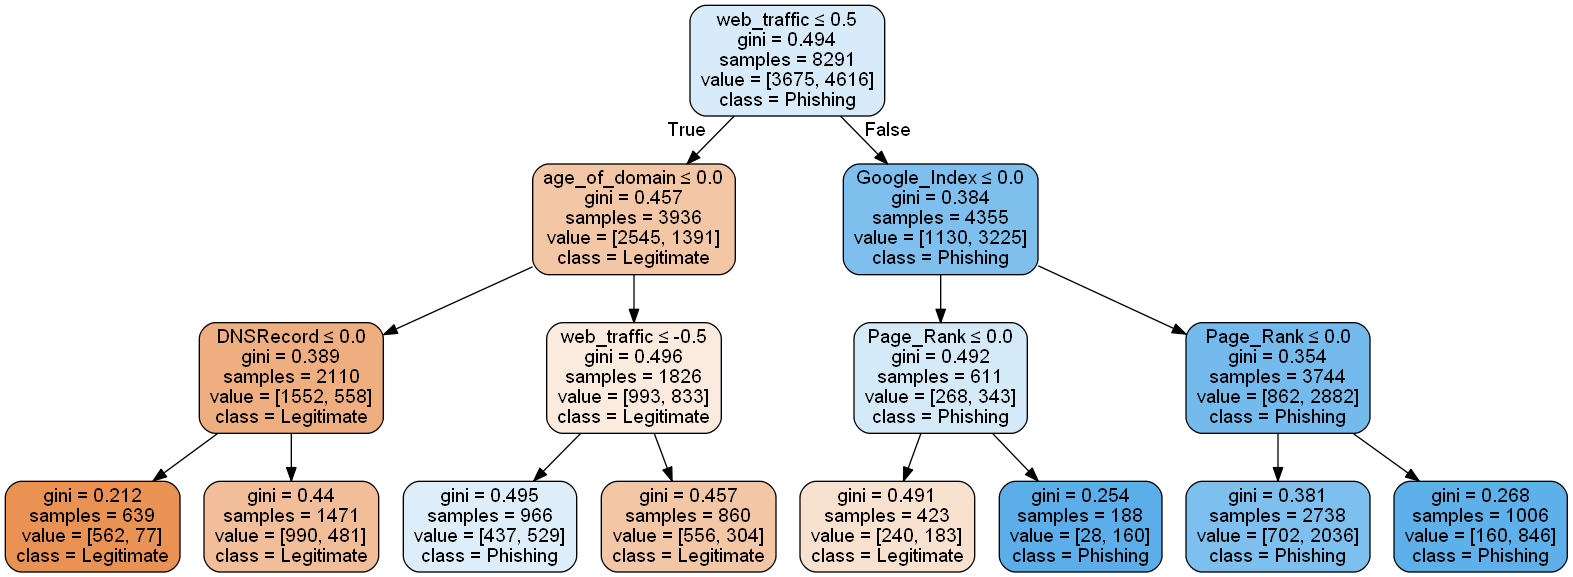

In [149]:
x = df[['age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report']]
y = df['Result']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25) #劃分訓練集和測試集

from sklearn import tree
cate = tree.DecisionTreeClassifier(criterion='gini',max_depth=3) #默認gini，深度3
domain_cate = cate.fit(x_train, y_train)

from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
from IPython.display import Image
import os
os.environ['PATH'] = os.environ['PATH'] + (';c:\\Program Files (x86)\\Graphviz2.38\\bin\\') # 解決Graphviz無法在jupyter生成的問題

#使用 pydotplus在jupyter內生成決策樹圖
dot_tree = tree.export_graphviz(domain_cate,out_file=None,feature_names=list(x),class_names=['Legitimate','Phishing'],filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_tree)
Image(graph.create_png())

**從網域欄位特徵分析：**  
web_traffic  
網站流量和排名是很直接能大致分辨出釣魚網站的特徵

---

### 3.5全特徵分析 (Decesion Tree)

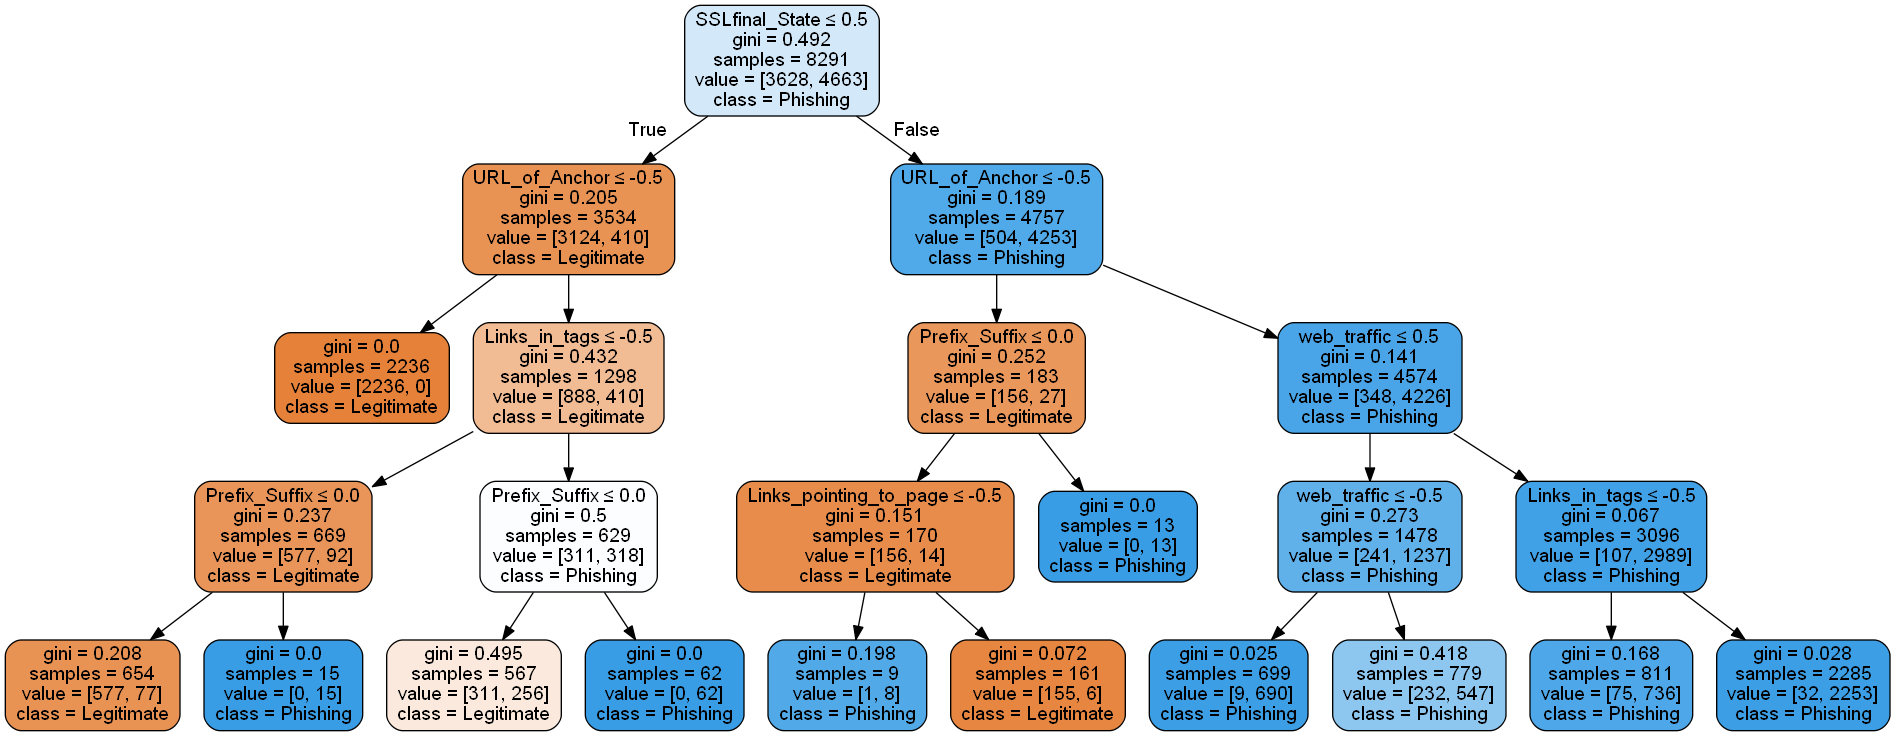

In [162]:
x = df[['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain',
       'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index',
       'Links_pointing_to_page', 'Statistical_report']]
y = df['Result']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25) #劃分訓練集和測試集

from sklearn import tree
cate = tree.DecisionTreeClassifier(criterion='gini',max_depth=4) #默認gini，深度3
phish_cate = cate.fit(x_train, y_train)

from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
from IPython.display import Image
import os
os.environ['PATH'] = os.environ['PATH'] + (';c:\\Program Files (x86)\\Graphviz2.38\\bin\\') # 解決Graphviz無法在jupyter生成的問題

#使用 pydotplus在jupyter內生成決策樹圖
dot_tree = tree.export_graphviz(phish_cate,out_file=None,feature_names=list(x),class_names=['Legitimate','Phishing'],filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_tree)
Image(graph.create_png())

**全特徵分析：**  
SSLfinal_State(地址欄位)、URL_of_Anchor(異常)  
網站SSL憑證的有效性和有效年限、以及網頁代碼內標籤錨點所指向的標的，這兩個特徵最能有效分類出釣魚網站和合法網站


**SSLfinal_State：**  
1. 單檢查網址是否是https是不夠的  
2. 還會檢查https所分配的SSL(安全通訊協定)證書是否為信譽良好的頒發者、時效是否長    
3. 最受信任SSL頒發機構：GeoTrust, GoDaddy, Network Solutions, Thawte, Comodo, Doster and VeriSign  
4. 信譽良好的SSL證書最短時效為兩年

**見解：**  
谷歌已經公布若網址沒有轉為https會被列為**不安全**，故取得SSL憑證將網址轉為https是必要之舉  
但是要獲得信譽良好公司所頒發的SSL且時效要長，價格不斐，1年的單一網址約要2000新台幣，這還不包含子網域的部分(上看1萬元)  
所以一般小網站或是釣魚網站所採用的SSL憑證大多為免費版，而免費版憑證(例如：SSL For Free)期限約3個月而已

----

# V.I PCA

In [66]:
df['Statistical_report'].replace('Legitimate',-1,inplace=True)
df['Statistical_report'].replace('Phishing',1,inplace=True)

In [67]:
from sklearn.preprocessing import StandardScaler
features = df.columns[:-1]
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features

In [68]:
x.shape

(11055, 30)

In [69]:
np.mean(x),np.std(x)

(-6.513040605188315e-18, 0.9999999999999999)

In [70]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]

In [71]:
normalised_phishing = pd.DataFrame(x,columns=feat_cols)

In [72]:
normalised_phishing.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
11050,0.722709,-0.478816,0.387614,-2.383224,0.385295,2.558530,1.145038,0.821486,-0.704374,-2.093992,...,-4.714318,-2.042826,-3.150224,0.940526,0.672542,-1.555270,-0.589921,0.402154,1.151029,0.403822
11051,-1.383683,2.131943,0.387614,-2.383224,-2.595415,-0.390849,1.145038,-1.371855,-0.704374,-2.093992,...,0.212120,-2.042826,0.317438,0.940526,0.672542,0.861076,1.695143,0.402154,-2.358245,0.403822
11052,0.722709,-0.478816,0.387614,0.419600,0.385295,-0.390849,1.145038,-1.371855,-0.704374,0.477557,...,0.212120,0.489518,0.317438,0.940526,0.672542,0.861076,-0.589921,0.402154,-0.603608,0.403822
11053,-1.383683,-0.478816,0.387614,0.419600,0.385295,-0.390849,-1.301501,-1.371855,1.419700,-2.093992,...,0.212120,-2.042826,0.317438,0.940526,0.672542,0.861076,-0.589921,0.402154,1.151029,0.403822
11054,-1.383683,-0.478816,0.387614,0.419600,0.385295,-0.390849,-1.301501,-1.371855,1.419700,0.477557,...,0.212120,0.489518,0.317438,-1.063235,0.672542,-1.555270,-0.589921,-2.486611,1.151029,-2.476340


In [73]:
from sklearn.decomposition import PCA
pca_phishing = PCA(n_components=2)
principalComponents_phishing = pca_phishing.fit_transform(x)

In [74]:
principal_phishing_Df = pd.DataFrame(data = principalComponents_phishing
             , columns = ['principal component 1', 'principal component 2'])

In [75]:
principal_phishing_Df.tail()

,principal component 1,principal component 2
11050,6.300815,-3.562941
11051,5.118177,0.714354
11052,-1.661494,-0.729262
11053,1.742428,-1.442643
11054,-0.701089,-0.290422


In [76]:
print('Explained variation per principal component: {}'.format(pca_phishing.explained_variance_ratio_))

Explained variation per principal component: [0.17859628 0.13596025]


## V.II Visualization

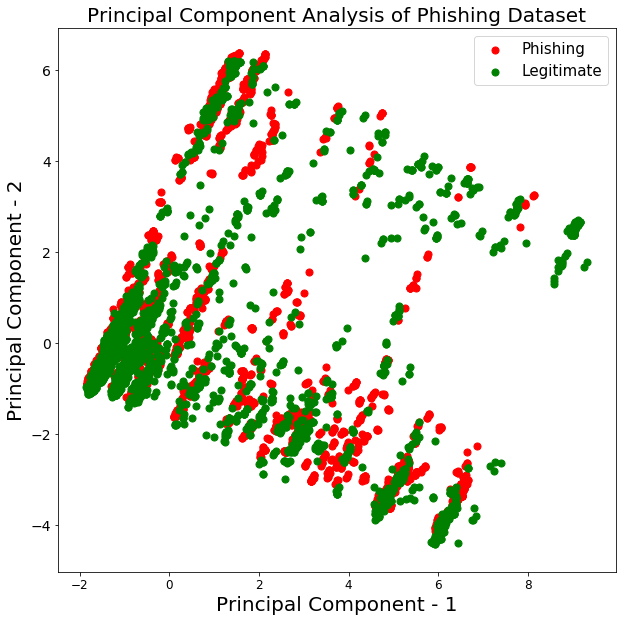

In [77]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Phishing Dataset",fontsize=20)
targets = ['Phishing', 'Legitimate']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df['Result'] == target
    plt.scatter(principal_phishing_Df.loc[indicesToKeep, 'principal component 1']
               , principal_phishing_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})